(mosfit)=

# Plot MOSFiT Models

This notebook shows an example on how to work with MOSFiT models provided in the database. First, import the required packages.

In [1]:
from slsne.utils import get_params, plot_colors
from slsne.models import slsnni
import numpy as np
import matplotlib.pyplot as plt

Use the `get_params` function to get all the parameters for a single object

In [2]:
# Define the object to read in
object_name = '2018lfe'
params = get_params(object_name)
redshift = params.meta['Redshift']

# Select the bands to use
bands = ['B', 'r']

We can use the `slsnni` model function to re-create the MOSFiT model for arbitrary phases.

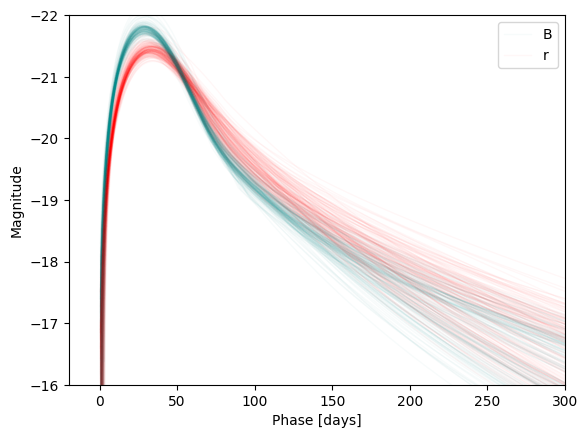

In [4]:
# Phases to use for calculations
phases = np.append(np.linspace(0, 100, 201), np.linspace(100, 800, 351))

# Calculate SEDs for each walker
for j in range(len(params)):
    print(j + 1, 'of', len(params))
    # Read in parameters
    param = params[j]
    Pspin = param['Pspin']
    Bfield = 10 ** param['log(Bfield)'] / 1e14
    Mns = param['Mns']
    thetaPB = param['thetaPB']
    kappa = param['kappa']
    log_kappa_gamma = np.log10(param['kappagamma'])
    mejecta = param['mejecta']
    fnickel = param['fnickel']
    v_ejecta = param['vejecta']
    temperature = param['temperature']
    cut_wave = param['cutoff_wavelength']
    alpha = param['alpha']

    # Modify parameters for rest-frame models
    texplosion_rest = param['texplosion'] - np.median(params['texplosion'])
    redshift_rest = 0
    ebv = 0
    log_nh_host_rest = 16

    # Get magnitudes in each band
    output_mags = slsnni(phases, Pspin, Bfield, Mns, thetaPB, texplosion_rest, kappa,
                         log_kappa_gamma, mejecta, fnickel, v_ejecta, temperature,
                         cut_wave, alpha, redshift_rest, log_nh_host_rest, ebv, bands)

    m1, = plt.plot(phases, output_mags['B'], color = plot_colors('B'), alpha = 0.03, linewidth = 1, label = 'B')
    m2, = plt.plot(phases, output_mags['r'], color = plot_colors('r'), alpha = 0.03, linewidth = 1, label = 'r')

plt.gca().invert_yaxis()
plt.xlabel('Phase [days]')
plt.ylabel('Magnitude')
plt.xlim(-20, 300)
plt.ylim(-16, -22)
plt.legend(handles = [m1, m2], loc = 'best')
plt.show();